In [7]:
import cv2,sys,os
import numpy as np
import fnmatch
import matplotlib.pyplot as plt

# Resize

In [96]:
def resize(img_file,width,height):
    img = cv2.imread(img_file)
    #cv2.imshow('Original image',img)
    #cv2.waitKey(0)
    org_height,org_width = img.shape[0:2]
    print('width :',org_width)
    print('height :',org_height)

    if org_width >= org_height:
        new_image = cv2.resize(img,(width,height))
    else:
        new_image = cv2.resize(img,(height,width))
    
    return img_file,new_image

In [69]:
img_path,resized_img = resize('./img/001.jpg',1280,960)
# cv2.imshow('Original image',resized_img)
# cv2.waitKey(0)

width : 628
height : 392


# Blur

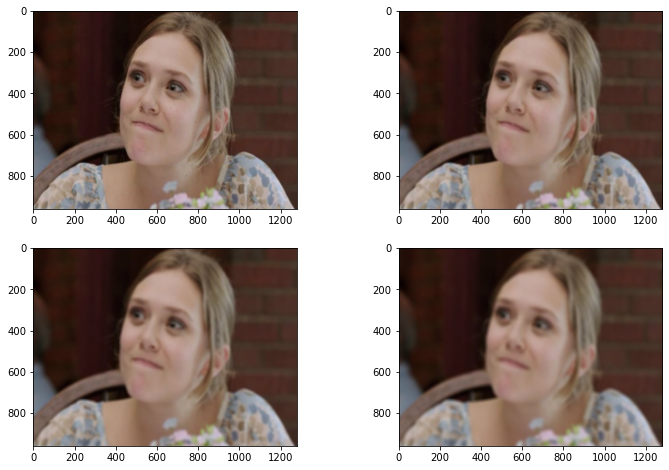

In [70]:
def blur_img(img):
    plt.figure(figsize=(12,8))
    kernels = [5,10,15,20]
    for idk,k in enumerate(kernels):
        ax = plt.subplot(2,2,idk+1)
        img_blur = cv2.blur(img,ksize=(k,k))
        img_blur = cv2.cvtColor(img_blur,cv2.COLOR_BGR2RGB)
        ax.imshow(img_blur)
        #cv2.imshow(str(k),img_blur)
        #cv2.waitKey(0)
    return img_blur

blured_img = blur_img(resized_img)

# Sharpen

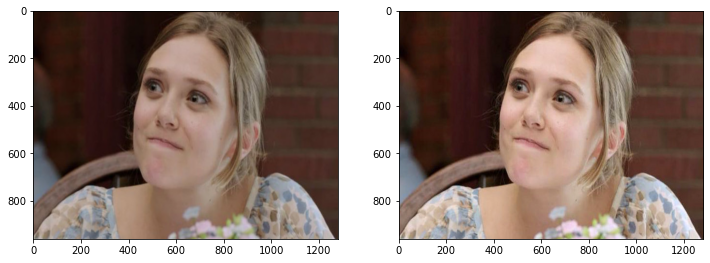

In [71]:
def sharpen(img):
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(1,2,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax1.imshow(img)
    
    kernel = np.array([[0.2,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    new_img = cv2.filter2D(img,-1,kernel)
    ax2 = plt.subplot(1,2,2)
    ax2.imshow(new_img)
    
    return new_img

new_img = sharpen(resized_img)

# Batch Process Images

In [104]:
listOfFiles = os.listdir('./img/')
pattern = '*.jpg'
# n = len(sys.argv)
# if n == 3:
#     width = int(sys.argv[1])
#     height = int(sys.argv[2])
# else:
#     width = 1280
#     height = 960
width = 1280
height = 960
if not os.path.isdir('new_img'):
    os.makedirs('new_img')
    
for filename in listOfFiles:
    #if fnmatch(filename,pattern):
    if filename.endswith('.jpg'):
        print(filename)
        filename,new_img = resize('./img/'+filename,width,height)
        filename = filename.split('/')[-1]
        print('./new_img/'+filename)
        cv2.imwrite('./new_img/'+filename,new_img)

000.jpg
width : 4542
height : 2555
./new_img/000.jpg
001.jpg
width : 628
height : 392
./new_img/001.jpg
